# **IMPORTING THE NECESSARY LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# **IMPORTING THE DATASETS**

In [ ]:
d1 = pd.read_csv('RL7_train.csv')
d2 = pd.read_csv('D2_train.csv')
d3 = pd.read_csv('E1_train.csv')
d4 = pd.read_csv('G8_train.csv')
d5 = pd.read_csv('I9_train.csv')
d6 = pd.read_csv('L5_train.csv')
d7 = pd.read_csv('RS6_train.csv')
d8 = pd.read_csv('S4_train.csv')
d9= pd.read_csv('W3_train.csv')

# **MERGING ALL 9 DATASETS**

In [ ]:
dataset = pd.concat([d1,d2,d3,d4,d5,d6,d7,d8,d9], axis=0)

In [ ]:
dataset.head()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
0,1628327640,-0.292480,0.950684,-0.017578,-3.112793,-0.732422,-2.441406,-198.0,1359.0,579.0,7.0
1,1628327640,-0.288086,0.929199,-0.014160,-2.807617,-0.061035,-1.953125,-207.0,1341.0,568.5,7.0
2,1628327640,-0.294434,0.923340,-0.006348,-2.197266,1.708984,-0.610352,-211.5,1344.0,571.5,7.0
3,1628327640,-0.306641,0.922852,-0.010742,-0.549316,0.610352,-0.854492,-201.0,1351.5,564.0,7.0
4,1628327640,-0.315918,0.925293,0.003906,1.220703,15.380859,-0.305176,-198.0,1369.5,580.5,7.0


In [ ]:
dataset=dataset.drop(columns=['time'])

In [ ]:
dataset.head()

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
0,-0.292480,0.950684,-0.017578,-3.112793,-0.732422,-2.441406,-198.0,1359.0,579.0,7.0
1,-0.288086,0.929199,-0.014160,-2.807617,-0.061035,-1.953125,-207.0,1341.0,568.5,7.0
2,-0.294434,0.923340,-0.006348,-2.197266,1.708984,-0.610352,-211.5,1344.0,571.5,7.0
3,-0.306641,0.922852,-0.010742,-0.549316,0.610352,-0.854492,-201.0,1351.5,564.0,7.0
4,-0.315918,0.925293,0.003906,1.220703,15.380859,-0.305176,-198.0,1369.5,580.5,7.0


# **SHAPE OF DATSET**

In [ ]:
dataset.shape

(5548032, 10)

# **CHECKING FOR NULL VALUES**

In [ ]:
dataset.isnull().sum()

acc_x    0
acc_y    0
acc_z    0
gyr_x    0
gyr_y    0
gyr_z    0
mag_x    0
mag_y    0
mag_z    0
label    0
dtype: int64

# **REPLACING NULL VALUES AND DROPPING NAN VALUES**

In [ ]:
dataset = dataset.dropna()

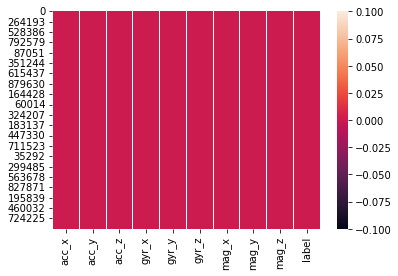

In [ ]:
sns.heatmap(dataset.isnull())

# **COLUMNS**

In [ ]:
dataset.columns

Index(['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x', 'mag_y',
       'mag_z', 'label'],
      dtype='object')

# **VISUALIZING THE LABEL ATTRIBUTE**

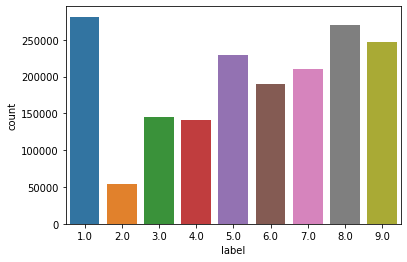

In [ ]:
sns.countplot(x="label",data=dataset)

# **CHECKING FOR CATEGORICAL COLUMN**

In [ ]:
def value_type(dataset):
  categorical=[]
  numerical=[]
  for i in dataset.columns:
    if dataset[i].dtype == 'object':
      categorical.append(i)
    else:
      numerical.append(i)
  return categorical,numerical

category,numerical=value_type(dataset)
print('columns with categorical values:',category)
print('columns with numerical values:',numerical)


columns with categorical values: []
columns with numerical values: ['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x', 'mag_y', 'mag_z', 'label']


# **CHECKING FOR UNIQUE VALUES IN LABEL COLUMN**

In [ ]:
print('values in Label column:',dataset['label'].nunique())
print('values:',dataset['label'].unique())

values in Label column: 9
values: [ 7. nan  2.  1.  8.  9.  5.  6.  4.  3.]


# **SPLITTING THE DEPENDANT AND INDEPENDANT VARIABLE**

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# **SPLITTING THE TRAINING AND TEST DATA**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# **FEATURE SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **APPLYING RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 4, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

# **CONFUSION MATRIX AND ACCURACY SCORE**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[283219    135    230   4924     10   1434     52   4161      2]
 [   415  15092    234    242     15    132      9     74      4]
 [  1186    350  35881   2230    312   1782    293   1674     34]
 [ 12490    233   1645 220630    609   9702   1404   6121     17]
 [    74     43    528   1454 269061    274   9687    322    200]
 [  3150    175   1581  19706    202 238905    450   4715     21]
 [   141     27    372   2029  15095    803 255301    516    147]
 [  9299     94   2203  12987    581  12412    842  72265     61]
 [    14      4    143     68    588    108    459    145 120181]]


0.9075498224596104

# **CLASSIFICATION REPORT**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.91      0.96      0.94    294167
         2.0       0.93      0.93      0.93     16217
         3.0       0.84      0.82      0.83     43742
         4.0       0.83      0.87      0.85    252851
         5.0       0.94      0.96      0.95    281643
         6.0       0.90      0.89      0.89    268905
         7.0       0.95      0.93      0.94    274431
         8.0       0.80      0.65      0.72    110744
         9.0       1.00      0.99      0.99    121710

    accuracy                           0.91   1664410
   macro avg       0.90      0.89      0.89   1664410
weighted avg       0.91      0.91      0.91   1664410



# **ACTUAL VS PREDICTED**

In [ ]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head(5)

,Actual,Predicted
0,5.0,7.0
1,7.0,7.0
2,1.0,1.0
3,6.0,6.0
4,6.0,6.0


# **CHECKING PREDICTION FOR NEW VALUES**

In [ ]:
print(classifier.predict([[0.1921,-1.102051,-0.2559,-3.4566,39.93653,4.57324,-33.5,21.5,61.5	]]))

[1.]


# **TRAINING SCORE AND TEST SCORE**

In [ ]:
print(classifier.score(X_train,y_train))
print(classifier.score(X_test,y_test))

0.9836508290456693
0.9075498224596104
